#### import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#### loading and understanding dataset


In [2]:
df=pd.read_csv('cardekho_imputated.csv')
df.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [4]:
df.shape

(15411, 13)

In [5]:
df.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


#### Data Cleaning

In [6]:
df.isnull().sum()

car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(167)

In [8]:
df[df.duplicated()]

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
197,Honda City,Honda,City,8,70000,Individual,Petrol,Manual,16.80,1497,116.30,5,545000
360,Maruti Baleno,Maruti,Baleno,2,5000,Individual,Petrol,Automatic,21.40,1197,83.10,5,686000
1353,Maruti Swift Dzire,Maruti,Swift Dzire,4,50000,Individual,Diesel,Manual,28.40,1248,74.02,5,680000
1429,Maruti Wagon R,Maruti,Wagon R,13,100000,Individual,Petrol,Manual,18.90,1061,67.00,5,150000
1485,Hyundai i20,Hyundai,i20,3,50000,Individual,Petrol,Manual,18.60,1197,81.83,5,625000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15229,Maruti Swift,Maruti,Swift,8,80000,Individual,Diesel,Manual,22.90,1248,74.00,5,350000
15324,Maruti Wagon R,Maruti,Wagon R,6,50000,Individual,CNG,Manual,26.60,998,58.16,5,450000
15367,Tata Tiago,Tata,Tiago,4,30000,Individual,Petrol,Manual,23.84,1199,84.00,5,350000
15378,Hyundai Grand,Hyundai,Grand,6,30000,Individual,Petrol,Manual,18.90,1197,82.00,5,450000


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df[df.duplicated()]

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15244 entries, 0 to 15410
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15244 non-null  object 
 1   brand              15244 non-null  object 
 2   model              15244 non-null  object 
 3   vehicle_age        15244 non-null  int64  
 4   km_driven          15244 non-null  int64  
 5   seller_type        15244 non-null  object 
 6   fuel_type          15244 non-null  object 
 7   transmission_type  15244 non-null  object 
 8   mileage            15244 non-null  float64
 9   engine             15244 non-null  int64  
 10  max_power          15244 non-null  float64
 11  seats              15244 non-null  int64  
 12  selling_price      15244 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.6+ MB


In [12]:
df.columns

Index(['car_name', 'brand', 'model', 'vehicle_age', 'km_driven', 'seller_type',
       'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power',
       'seats', 'selling_price'],
      dtype='object')

In [13]:
categorical_cols=[i for i in df.columns if df[i].dtypes=='O']
categorical_cols

['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']

In [14]:
for i in categorical_cols:
    print(df[i].unique())
    print("-"*20)

['Maruti Alto' 'Hyundai Grand' 'Hyundai i20' 'Ford Ecosport'
 'Maruti Wagon R' 'Hyundai i10' 'Hyundai Venue' 'Maruti Swift'
 'Hyundai Verna' 'Renault Duster' 'Mini Cooper' 'Maruti Ciaz'
 'Mercedes-Benz C-Class' 'Toyota Innova' 'Maruti Baleno'
 'Maruti Swift Dzire' 'Volkswagen Vento' 'Hyundai Creta' 'Honda City'
 'Mahindra Bolero' 'Toyota Fortuner' 'Renault KWID' 'Honda Amaze'
 'Hyundai Santro' 'Mahindra XUV500' 'Mahindra KUV100' 'Maruti Ignis'
 'Datsun RediGO' 'Mahindra Scorpio' 'Mahindra Marazzo' 'Ford Aspire'
 'Ford Figo' 'Maruti Vitara' 'Tata Tiago' 'Volkswagen Polo' 'Kia Seltos'
 'Maruti Celerio' 'Datsun GO' 'BMW 5' 'Honda CR-V' 'Ford Endeavour'
 'Mahindra KUV' 'Honda Jazz' 'BMW 3' 'Audi A4' 'Tata Tigor'
 'Maruti Ertiga' 'Tata Safari' 'Mahindra Thar' 'Tata Hexa'
 'Land Rover Rover' 'Maruti Eeco' 'Audi A6' 'Mercedes-Benz E-Class'
 'Audi Q7' 'BMW Z4' 'BMW 6' 'Jaguar XF' 'BMW X5' 'MG Hector' 'Honda Civic'
 'Isuzu D-Max' 'Porsche Cayenne' 'BMW X1' 'Skoda Rapid' 'Ford Freestyle'
 'Skoda

In [15]:
# total cars

df.shape[0]

15244

In [16]:
print("Minimum selling price:",df['selling_price'].min())
print("Maximum selling price:",df['selling_price'].max())
print("Average selling price:",round(df['selling_price'].mean(),2))

Minimum selling price: 40000
Maximum selling price: 39500000
Average selling price: 774701.45


In [17]:
numerical_cols=[i for i in df.columns if df[i].dtypes!='object']
numerical_cols

['vehicle_age',
 'km_driven',
 'mileage',
 'engine',
 'max_power',
 'seats',
 'selling_price']

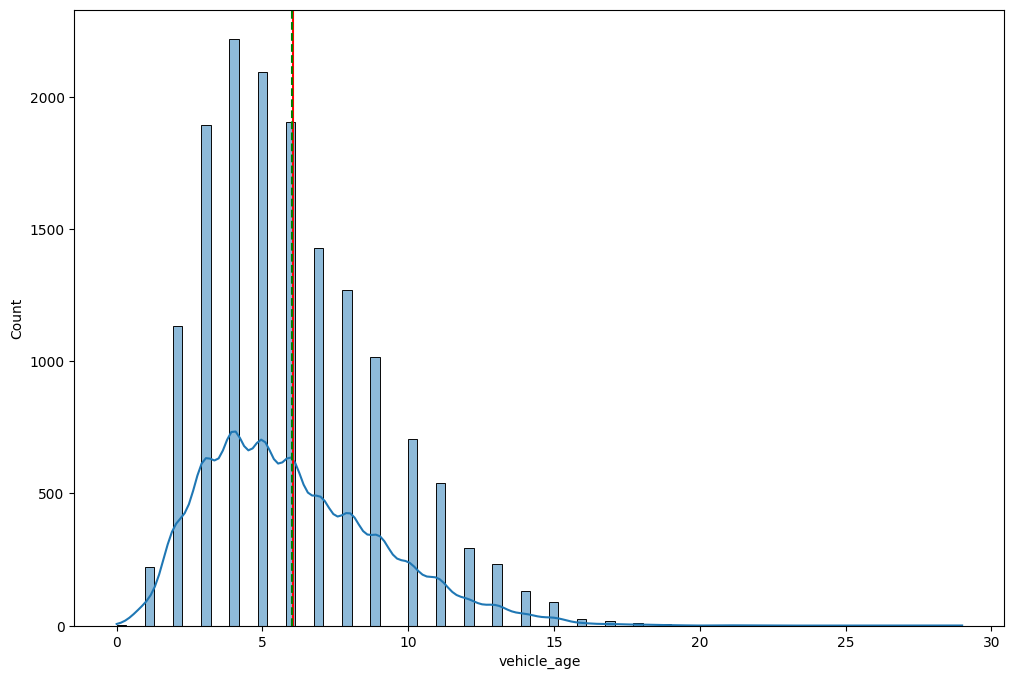

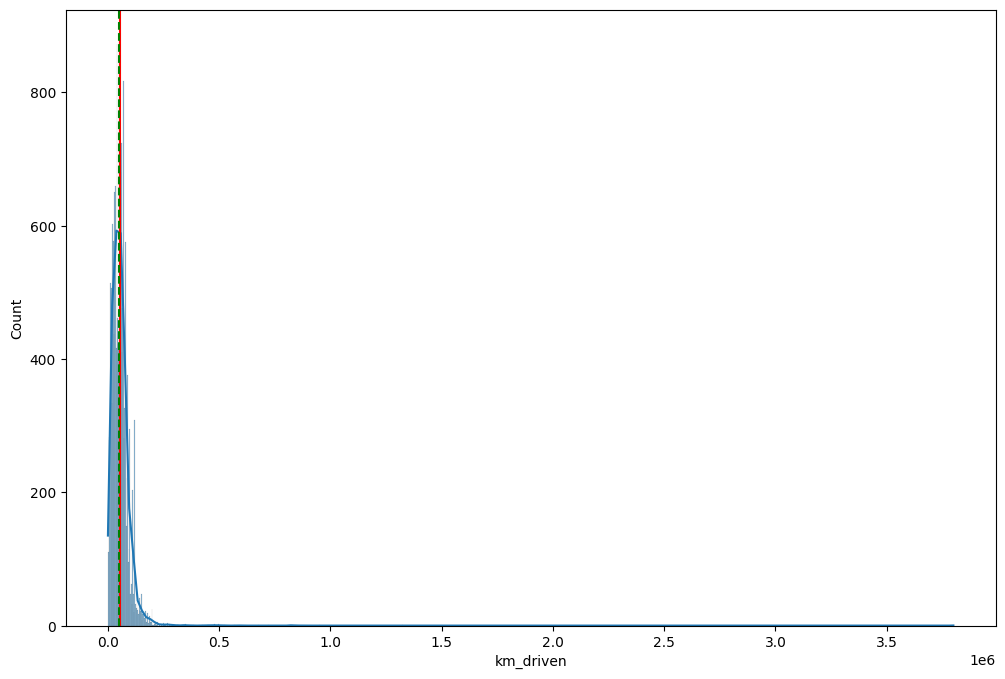

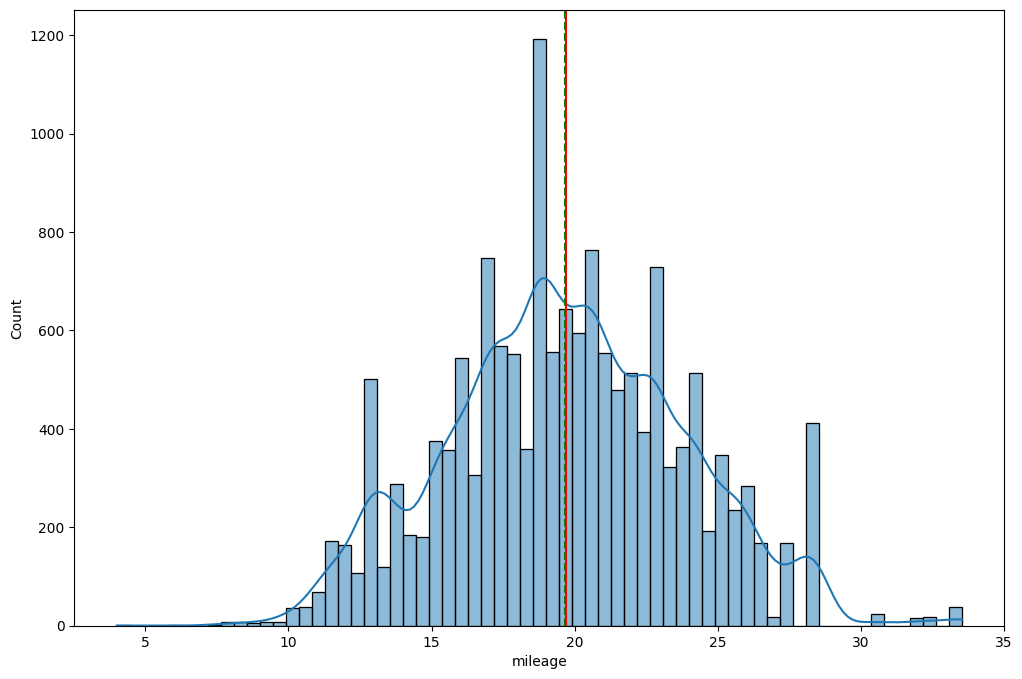

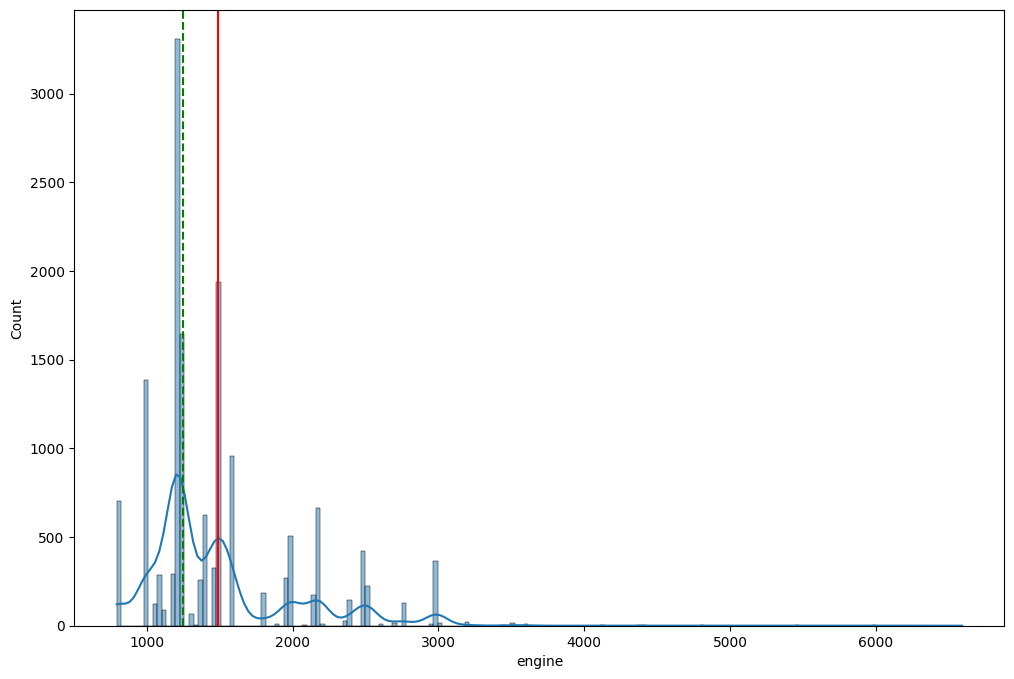

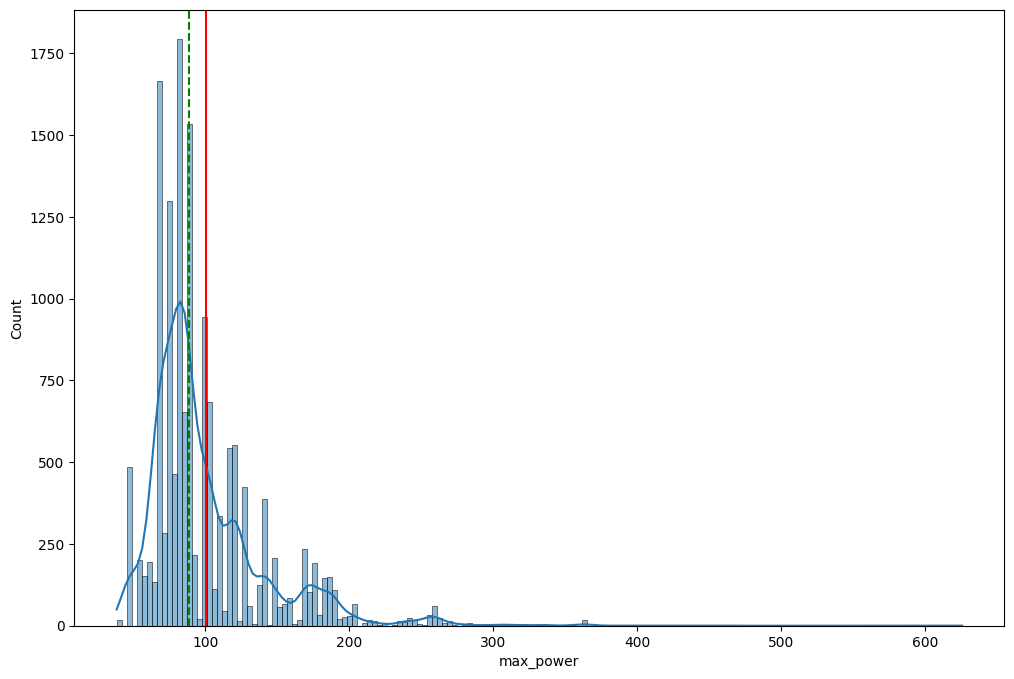

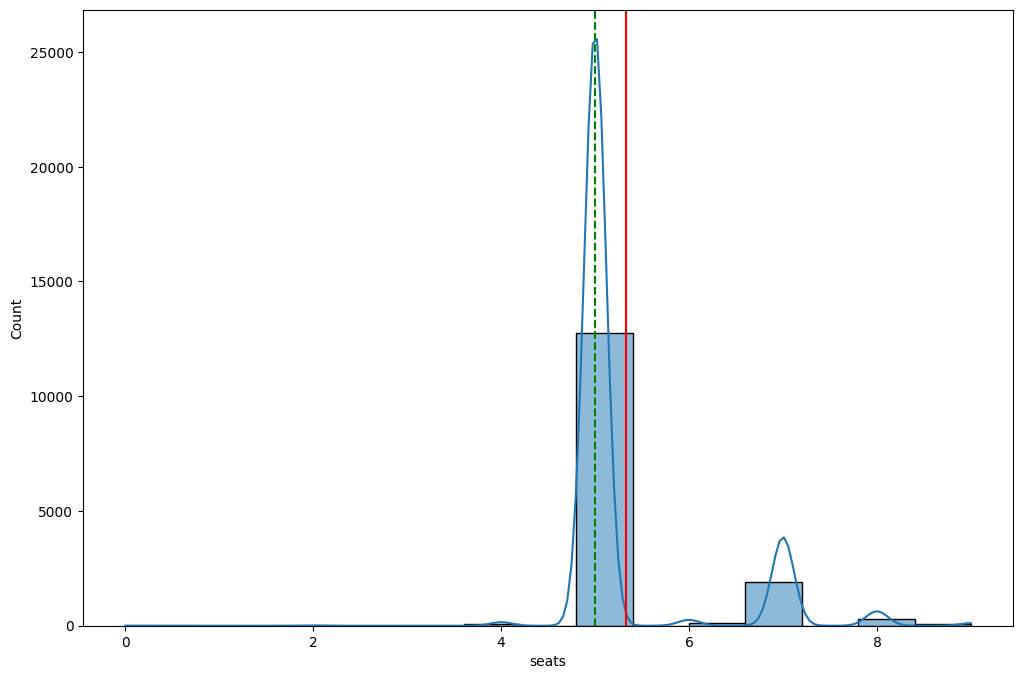

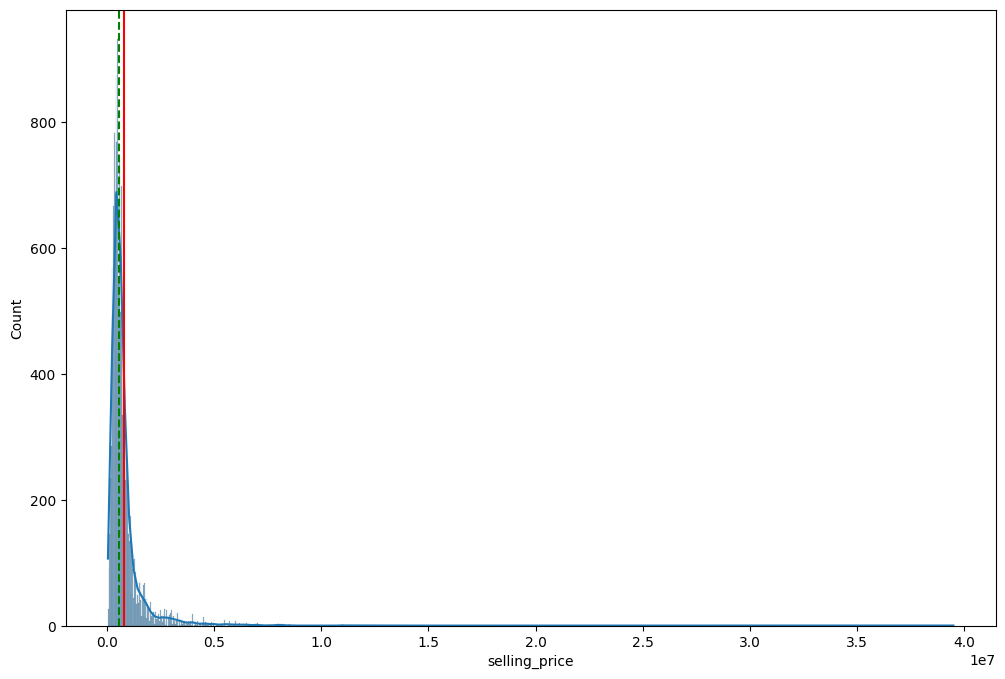

In [18]:
for i in numerical_cols:
    plt.figure(figsize=(12,8))
    sns.histplot(df[i],kde=True)
    plt.axvline(df[i].mean(),color='red')
    plt.axvline(df[i].median(),color='green',linestyle='--')
    plt.show()

<Axes: ylabel='selling_price'>

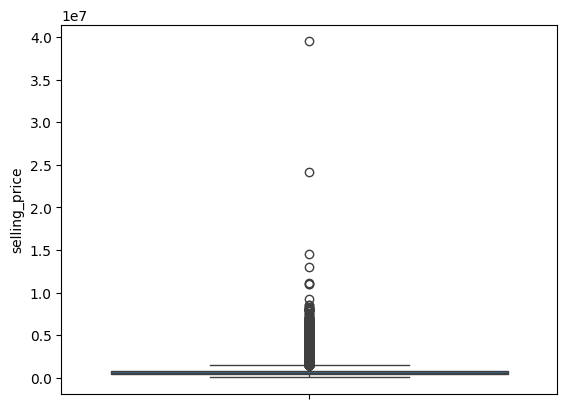

In [19]:
sns.boxplot(df['selling_price'])

In [20]:
print("average vehicle age:",round(df['vehicle_age'].mean(),2))

average vehicle age: 6.04


In [21]:
pd.options.display.float_format = '{:,.0f}'.format

In [22]:
df.groupby('vehicle_age')['selling_price'].mean().reset_index().sort_values(by='vehicle_age',ascending=False)

,vehicle_age,selling_price
23,29,"60,000"
22,25,"1,000,000"
21,22,"70,000"
20,21,"73,333"
19,19,"74,000"
18,18,"125,000"
17,17,"156,471"
16,16,"126,240"
15,15,"188,376"
14,14,"260,682"


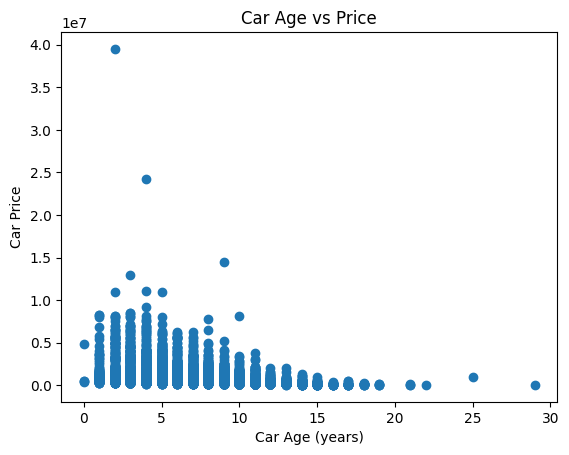

In [23]:
plt.scatter(df['vehicle_age'], df['selling_price'])
plt.xlabel("Car Age (years)")
plt.ylabel("Car Price")
plt.title("Car Age vs Price")
plt.show()

some very old cars have high prices, but they are rare. These points appear as outliers in the scatter plot and are usually due to luxury or vintage vehicles. Most old cars sell for much lower prices.

In [24]:
median_km = df['km_driven'].median()
print("km driven by cars:",median_km)

km driven by cars: 50000.0


<Axes: xlabel='km_driven', ylabel='selling_price'>

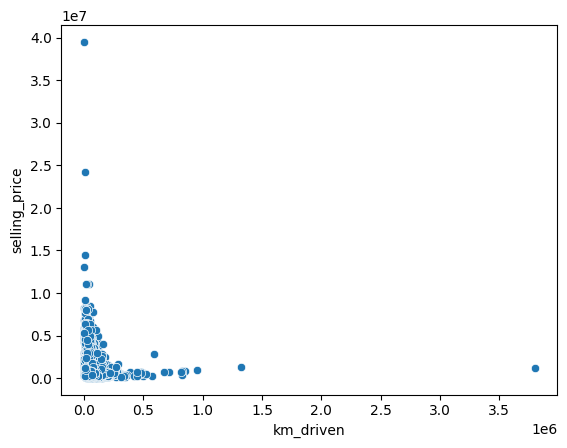

In [25]:
sns.scatterplot(x='km_driven',y='selling_price',data=df)

In [26]:
#min & max mileage

df['mileage'].min(), df['mileage'].max()


(np.float64(4.0), np.float64(33.54))

<Axes: xlabel='mileage', ylabel='selling_price'>

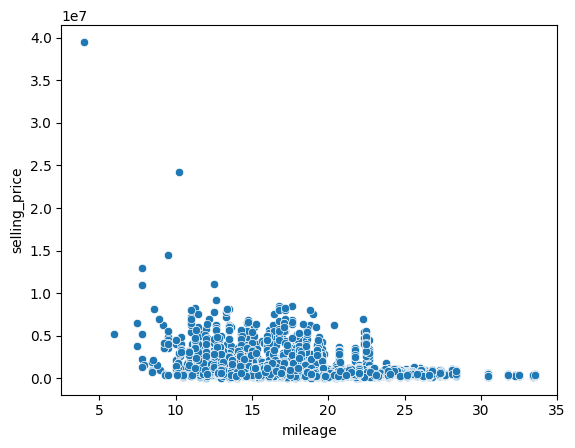

In [27]:
# Higher mileage = better fuel efficiency
sns.scatterplot(x='mileage',y='selling_price',data=df)

<Axes: xlabel='engine', ylabel='selling_price'>

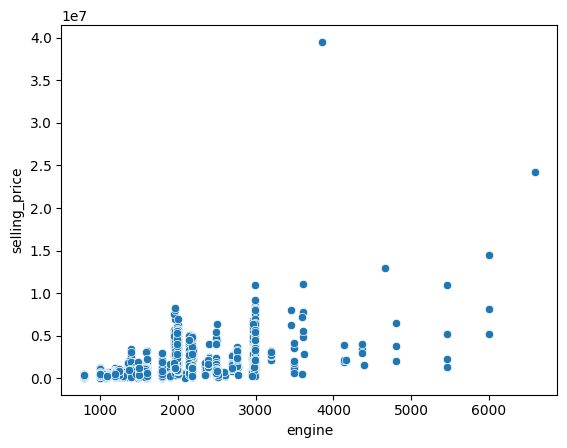

In [28]:
sns.scatterplot(x='engine',y='selling_price',data=df)

In [29]:
df['seats'].value_counts()

seats
5    12767
7     1902
8      310
6      125
4       76
9       55
2        7
0        2
Name: count, dtype: int64

In [30]:
df['seats'].value_counts(normalize=True) * 100


seats
5   84
7   12
8    2
6    1
4    0
9    0
2    0
0    0
Name: proportion, dtype: float64

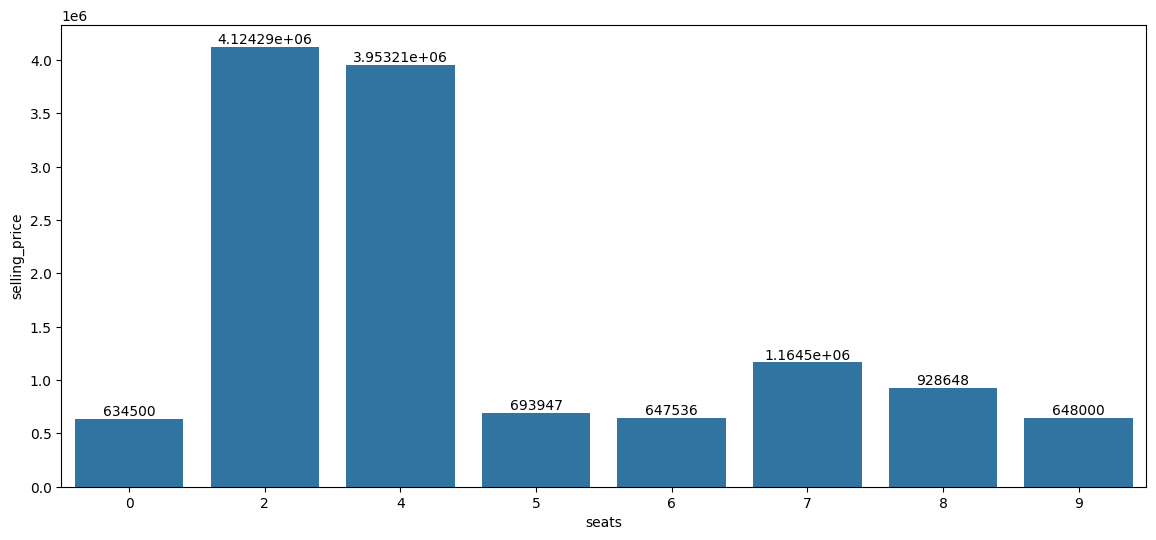

In [31]:
gb1=df.groupby('seats')['selling_price'].mean().reset_index()

plt.figure(figsize=(14,6))
ax=sns.barplot(x='seats',y='selling_price',data=gb1)

for bar in ax.containers:
    ax.bar_label(bar)

In [32]:
df['brand'].value_counts()

brand
Maruti           4933
Hyundai          2952
Honda            1476
Mahindra          999
Toyota            789
Ford              776
Volkswagen        614
Renault           527
BMW               436
Tata              421
Skoda             333
Mercedes-Benz     332
Audi              190
Datsun            170
Jaguar             58
Land Rover         50
Jeep               41
Kia                32
Porsche            21
Volvo              20
MG                 19
Mini               17
Nissan             11
Lexus               9
Isuzu               7
Bentley             3
Maserati            2
ISUZU               2
Ferrari             1
Mercedes-AMG        1
Rolls-Royce         1
Force               1
Name: count, dtype: int64

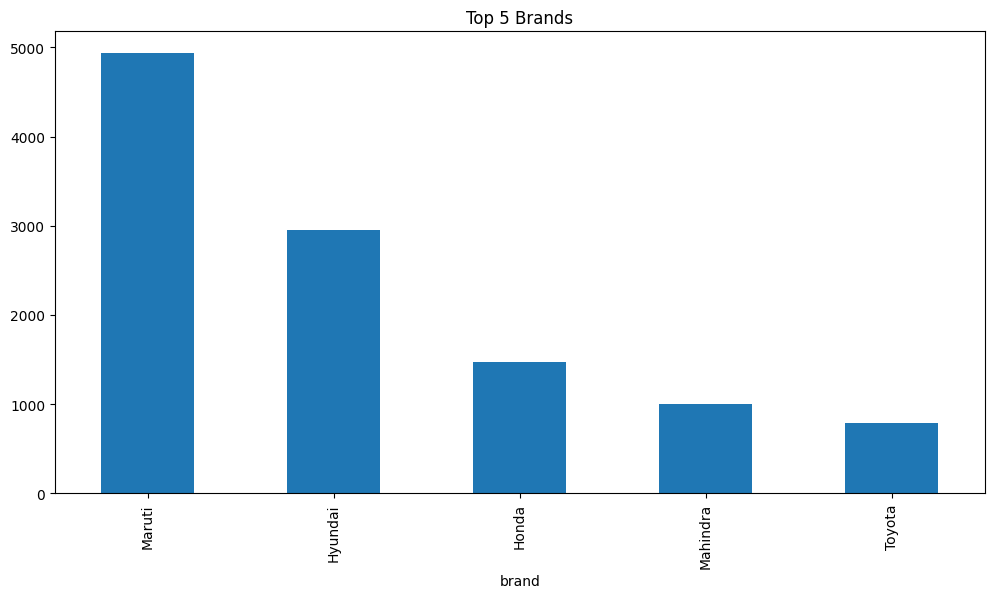

In [33]:
plt.figure(figsize=(12,6))
df['brand'].value_counts().head(5).plot(kind='bar')
plt.title("Top 5 Brands")
plt.show()

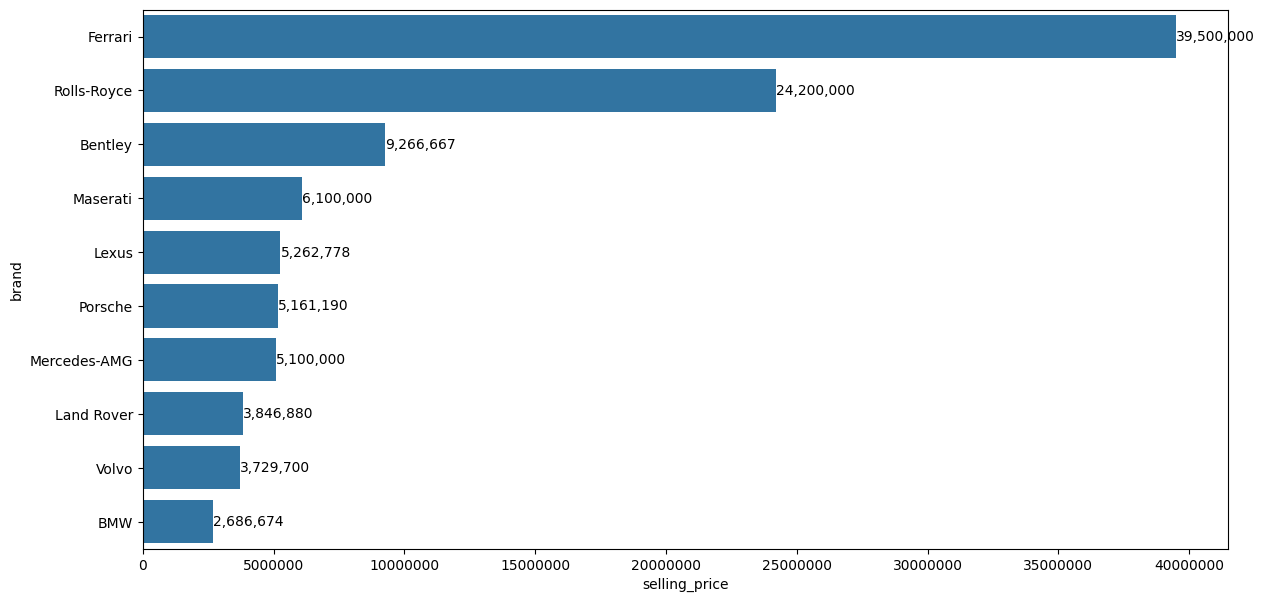

In [34]:
gb2=df.groupby('brand')['selling_price'].mean().reset_index().sort_values(by='selling_price',ascending=False).head(10)

plt.figure(figsize=(14,7))
ax=sns.barplot(x='selling_price',y='brand',data=gb2)

for bar in ax.containers:
    ax.bar_label(bar, fmt='{:,.0f}')

plt.ticklabel_format(style='plain', axis='x')
plt.show()

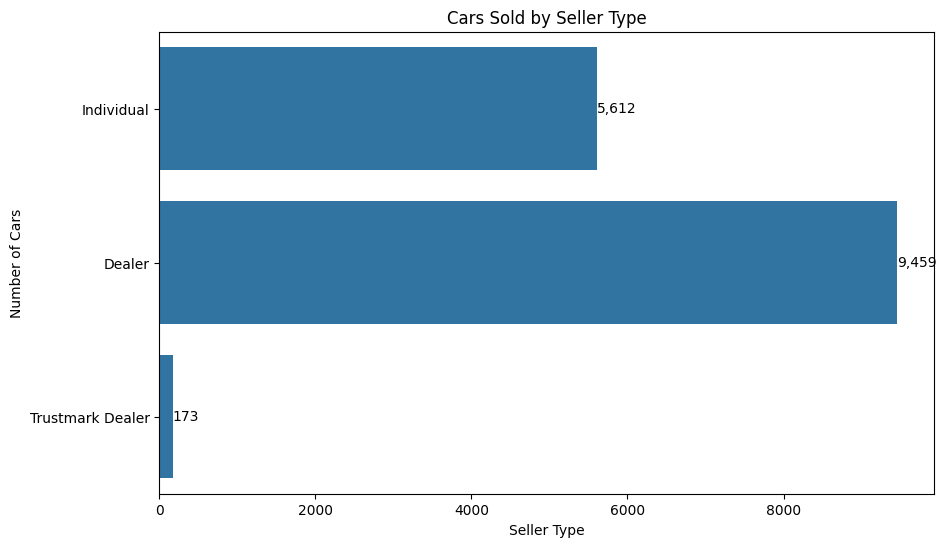

In [35]:
plt.figure(figsize=(10,6))
ax=sns.countplot(df['seller_type'])

for bar in ax.containers:
    ax.bar_label(bar, fmt='{:,.0f}')
plt.title("Cars Sold by Seller Type")
plt.xlabel("Seller Type")
plt.ylabel("Number of Cars")
plt.show()

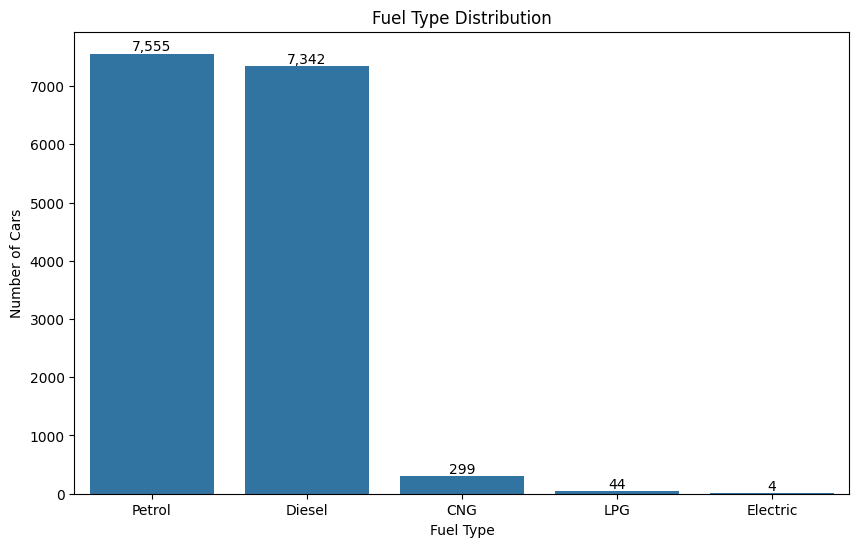

In [36]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='fuel_type', data=df)
plt.title("Fuel Type Distribution")
plt.xlabel("Fuel Type")
plt.ylabel("Number of Cars")

for bar in ax.containers:
    ax.bar_label(bar, fmt='{:,.0f}')

plt.show()

In [37]:
df.groupby('fuel_type')['selling_price'].mean()

fuel_type
CNG          417,689
Diesel     1,000,458
Electric   1,853,500
LPG          206,273
Petrol       572,178
Name: selling_price, dtype: float64

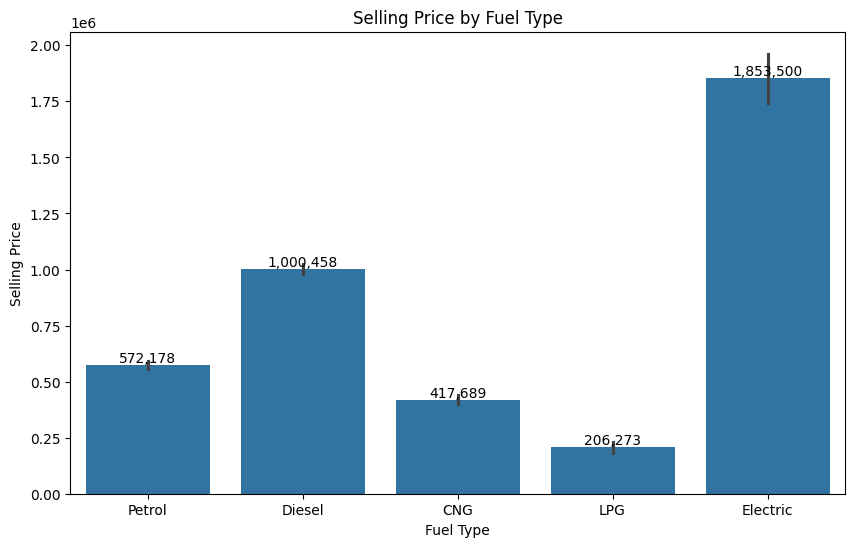

In [38]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x='fuel_type', y='selling_price', data=df)
for bar in ax.containers:
    ax.bar_label(bar, fmt='{:,.0f}')
plt.title("Selling Price by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Selling Price")
plt.show()

In [39]:
df.groupby('transmission_type')['selling_price'].mean()

transmission_type
Automatic   1,577,104
Manual        565,708
Name: selling_price, dtype: float64

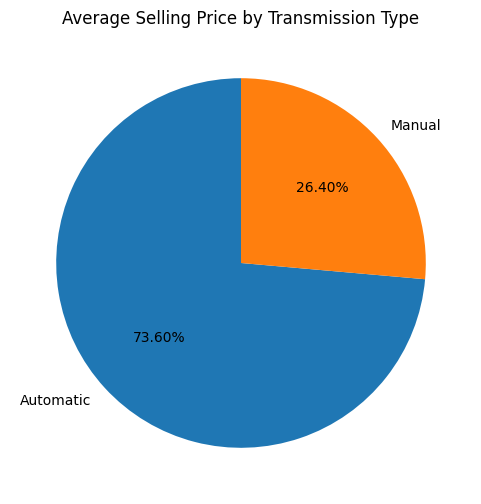

In [40]:
price_by_trans = df.groupby('transmission_type')['selling_price'].mean()
plt.figure(figsize=(6,6))
plt.pie(
    price_by_trans,
    labels=price_by_trans.index,
    autopct='%1.2f%%',
    startangle=90
)
plt.title("Average Selling Price by Transmission Type")
plt.show()

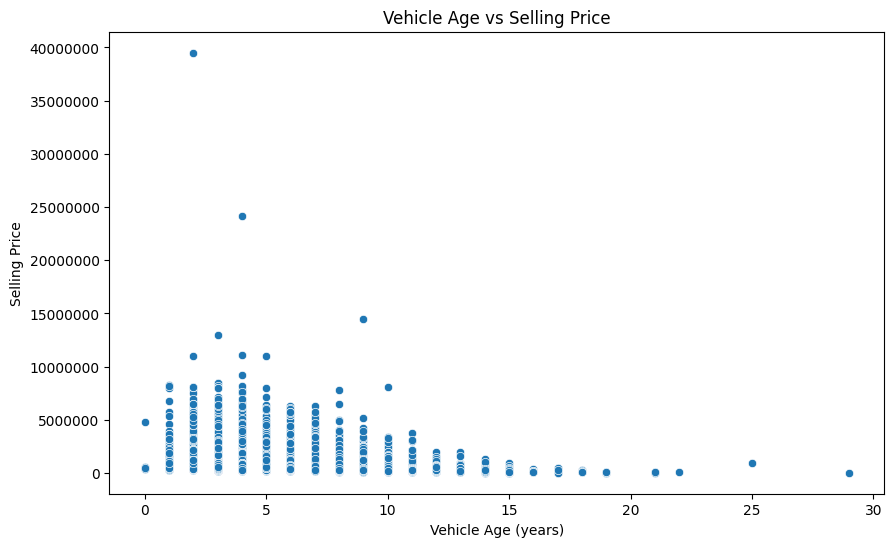

In [41]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='vehicle_age', y='selling_price', data=df)

plt.xlabel("Vehicle Age (years)")
plt.ylabel("Selling Price")
plt.title("Vehicle Age vs Selling Price")

plt.ticklabel_format(style='plain', axis='y')  # no scientific notation
plt.show()

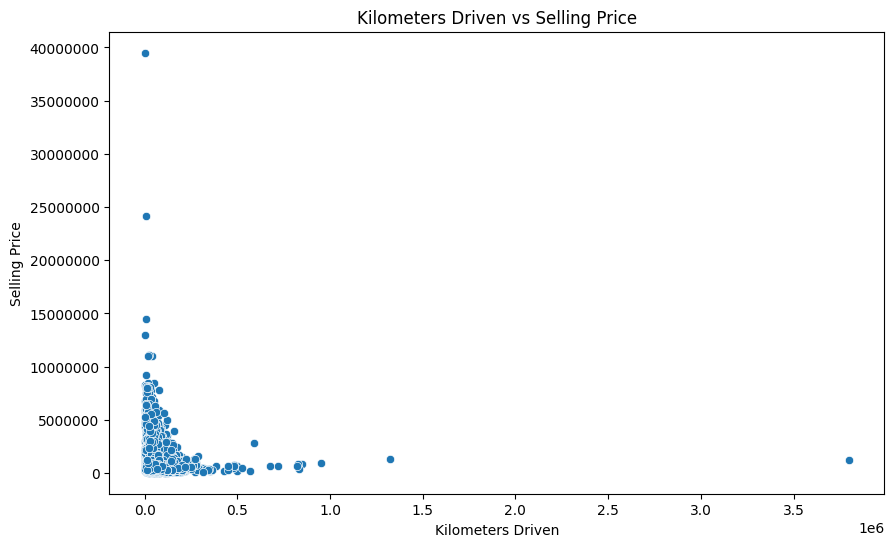

In [42]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='km_driven', y='selling_price', data=df)

plt.xlabel("Kilometers Driven")
plt.ylabel("Selling Price")
plt.title("Kilometers Driven vs Selling Price")

plt.ticklabel_format(style='plain', axis='y')  # no scientific notation
plt.show()


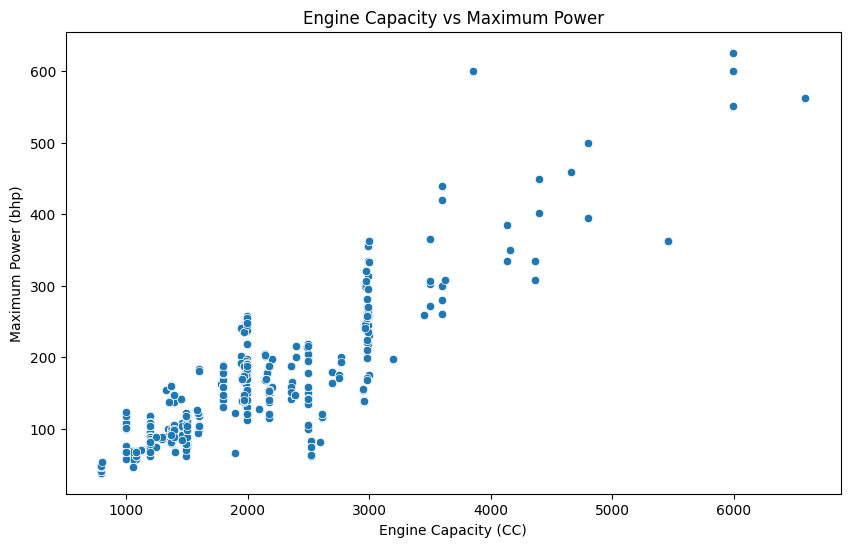

In [43]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='engine', y='max_power', data=df)

plt.xlabel("Engine Capacity (CC)")
plt.ylabel("Maximum Power (bhp)")
plt.title("Engine Capacity vs Maximum Power")

plt.show()


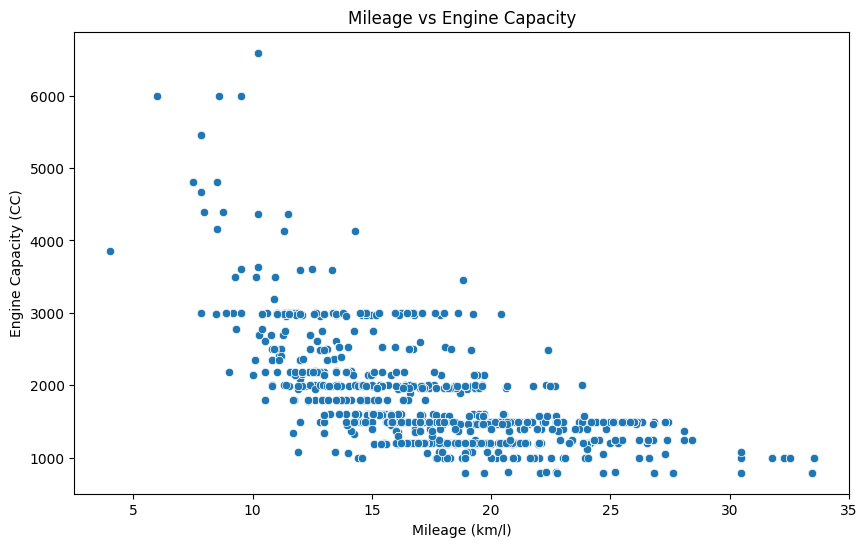

In [44]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='mileage', y='engine', data=df)

plt.xlabel("Mileage (km/l)")
plt.ylabel("Engine Capacity (CC)")
plt.title("Mileage vs Engine Capacity")

plt.ticklabel_format(style='plain', axis='y')  # optional
plt.show()


In [45]:
X=df.drop('selling_price',axis=1)
y=df['selling_price']

In [46]:
X.head()


,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,20,796,46,5
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,19,1197,82,5
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17,1197,80,5
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,21,998,67,5
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,23,1498,99,5


In [47]:
y.head()

0    120000
1    550000
2    215000
3    226000
4    570000
Name: selling_price, dtype: int64

In [48]:
from sklearn.preprocessing import LabelEncoder

le1=LabelEncoder()
le2=LabelEncoder()
X['brand']=le1.fit_transform(X['brand'])
X['model']=le2.fit_transform(X['model'])

In [49]:
ls1=['brand','model']

In [50]:
from sklearn.preprocessing import LabelEncoder
import pickle

encoders = {}

for col in ls1:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])
    encoders[col] = encoder

with open('encoders.pkl', 'wb') as f:
    pickle.dump(encoders, f)

print("Encoders saved successfully")

Encoders saved successfully


In [51]:
X.drop('car_name',axis=1,inplace=True)

In [52]:
X['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [53]:
cat_cols=X.select_dtypes(include='object').columns
num_cols=X.select_dtypes(exclude='object').columns

In [54]:
for i in cat_cols:
    print(df[i].unique())
    print("--"*20)

['Individual' 'Dealer' 'Trustmark Dealer']
----------------------------------------
['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
----------------------------------------
['Manual' 'Automatic']
----------------------------------------


In [55]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

oh_transformer=OneHotEncoder(drop='first')
num_transformer=StandardScaler()

preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_cols),
        ("StandardScaler",num_transformer,num_cols)
    ]
)

In [56]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['seller_type', 'fuel_type', 'transmission_type'], dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['brand', 'model', 'vehicle_age', 'km_driven', 'mileage', 'engine',
       'max_power', 'seats'],
      dtype='object'))])

In [57]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [58]:
X_train=preprocessor.fit_transform(X_train)
X_train

array([[ 0.        ,  0.        ,  0.        , ..., -0.54414512,
        -0.31731323, -0.39934429],
       [ 0.        ,  0.        ,  0.        , ...,  0.6132236 ,
         0.68633964, -0.39934429],
       [ 0.        ,  0.        ,  0.        , ..., -1.31251471,
        -1.0914935 , -0.39934429],
       ...,
       [ 0.        ,  0.        ,  1.        , ...,  1.75711215,
         1.09892673,  3.34712994],
       [ 1.        ,  0.        ,  0.        , ..., -1.31251471,
        -1.08361263, -0.39934429],
       [ 0.        ,  0.        ,  0.        , ..., -0.92929279,
        -0.77162261, -0.39934429]])

In [59]:
X_test=preprocessor.transform(X_test)
X_test

array([[ 1.        ,  0.        ,  0.        , ..., -0.54607086,
        -0.42949983, -0.39934429],
       [ 0.        ,  0.        ,  0.        , ...,  0.03165063,
         0.40819104, -0.39934429],
       [ 1.        ,  0.        ,  1.        , ..., -0.44785821,
        -0.27559094, -0.39934429],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.54607086,
        -0.42625476, -0.39934429],
       [ 0.        ,  0.        ,  1.        , ...,  0.03357637,
        -0.04148253, -0.39934429],
       [ 0.        ,  0.        ,  1.        , ...,  0.19533838,
         0.59825925, -0.39934429]])

In [60]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


In [61]:

models={
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "Lasso":Lasso(),
    "K-Neighbors Regressor":KNeighborsRegressor(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}

In [62]:
models.items()

dict_items([('LinearRegression', LinearRegression()), ('Ridge', Ridge()), ('Lasso', Lasso()), ('K-Neighbors Regressor', KNeighborsRegressor()), ('DecisionTreeRegressor', DecisionTreeRegressor()), ('RandomForestRegressor', RandomForestRegressor())])

In [63]:
import warnings
warnings.filterwarnings("ignore")

In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

for name, model in models.items():
    print(f"{name} training...")

    # Train the model
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Regression metrics
    model_mae = mean_absolute_error(y_test, y_pred)
    model_mse = mean_squared_error(y_test, y_pred)
    model_rmse = mean_squared_error(y_test, y_pred, squared=False)
    model_r2 = r2_score(y_test, y_pred)

    # Print results
    print(f"Model: {name}\n")
    print("📊 Testing Set Performance")
    print(f"MAE   : {model_mae:.2f}")
    print(f"MSE   : {model_mse:.2f}")
    print(f"RMSE  : {model_rmse:.2f}")
    print(f"R²    : {model_r2:.4f}")

    print("--" * 20, "\n")


LinearRegression training...
Model: LinearRegression

📊 Testing Set Performance
MAE   : 265431.21
MSE   : 270732887161.84
RMSE  : 520319.99
R²    : 0.6501
---------------------------------------- 

Ridge training...
Model: Ridge

📊 Testing Set Performance
MAE   : 265399.10
MSE   : 270733155610.16
RMSE  : 520320.24
R²    : 0.6501
---------------------------------------- 

Lasso training...
Model: Lasso

📊 Testing Set Performance
MAE   : 265432.25
MSE   : 270733181564.08
RMSE  : 520320.27
R²    : 0.6501
---------------------------------------- 

K-Neighbors Regressor training...
Model: K-Neighbors Regressor

📊 Testing Set Performance
MAE   : 113345.36
MSE   : 122790117090.17
RMSE  : 350414.21
R²    : 0.8413
---------------------------------------- 

DecisionTreeRegressor training...
Model: DecisionTreeRegressor

📊 Testing Set Performance
MAE   : 132693.74
MSE   : 135003750626.84
RMSE  : 367428.57
R²    : 0.8255
---------------------------------------- 

RandomForestRegressor training...


In [65]:
knn_params={'n_neighbors':[2,3,5,8,10,15,20,25,40,50]}
rf_params={
    "n_estimators":[100, 200, 300, 500],
        "max_depth":[5, 10, 15, 20, None],
        "min_samples_split":[2, 5, 10],
        "max_features":["sqrt", 5, 10, 15]
}

In [66]:
randomcv_models=[('KNN',KNeighborsRegressor(),knn_params),
                 ('RF',RandomForestRegressor(),rf_params)]

In [67]:
randomcv_models

[('KNN',
  KNeighborsRegressor(),
  {'n_neighbors': [2, 3, 5, 8, 10, 15, 20, 25, 40, 50]}),
 ('RF',
  RandomForestRegressor(),
  {'n_estimators': [100, 200, 300, 500],
   'max_depth': [5, 10, 15, 20, None],
   'min_samples_split': [2, 5, 10],
   'max_features': ['sqrt', 5, 10, 15]})]

In [68]:
from sklearn.model_selection import RandomizedSearchCV

model_param={}

for name,model,params in randomcv_models:
    random=RandomizedSearchCV(estimator=model,param_distributions=params,n_iter=100,cv=3,verbose=3,n_jobs=-1)

    random.fit(X_train,y_train)

    model_param[name]=random.best_params_

for model_name in model_param:
    print("----best params for ",model_name)
    print(model_param[model_name])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
----best params for  KNN
{'n_neighbors': 2}
----best params for  RF
{'n_estimators': 500, 'min_samples_split': 2, 'max_features': 15, 'max_depth': None}


In [69]:
models={
    "RandomForestRegressor":RandomForestRegressor(n_estimators= 500, min_samples_split= 2, max_features= 10, max_depth= 20,random_state=42),
    "K-Neighbors Regressor":KNeighborsRegressor(n_neighbors=2)
}
for name, model in models.items():
    print(f"{name} training...")

    # Train the model
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Regression metrics
    model_mae = mean_absolute_error(y_test, y_pred)
    model_mse = mean_squared_error(y_test, y_pred)
    model_rmse = mean_squared_error(y_test, y_pred, squared=False)
    model_r2 = r2_score(y_test, y_pred)

    # Print results
    print(f"Model: {name}\n")
    print("📊 Testing Set Performance")
    print(f"MAE   : {model_mae:.2f}")
    print(f"MSE   : {model_mse:.2f}")
    print(f"RMSE  : {model_rmse:.2f}")
    print(f"R²    : {model_r2:.4f}")

    print("--" * 20, "\n")


RandomForestRegressor training...
Model: RandomForestRegressor

📊 Testing Set Performance
MAE   : 102618.43
MSE   : 89556004769.42
RMSE  : 299259.09
R²    : 0.8843
---------------------------------------- 

K-Neighbors Regressor training...
Model: K-Neighbors Regressor

📊 Testing Set Performance
MAE   : 118289.82
MSE   : 118135094135.40
RMSE  : 343707.86
R²    : 0.8473
---------------------------------------- 



In [70]:
model=RandomForestRegressor(n_estimators= 500, min_samples_split= 2, max_features= 10, max_depth= 20,random_state=42)


In [71]:
model.fit(X_train,y_train)

RandomForestRegressor(max_depth=20, max_features=10, n_estimators=500,
                      random_state=42)

In [72]:
new_car = pd.DataFrame({
    'brand': ['Maruti'],
    'model': ['Alto'],
    'vehicle_age': [4],
    'km_driven': [25000],
    'seller_type': ['Individual'],
    'fuel_type': ['Petrol'],
    'transmission_type': ['Manual'],
    'mileage': [20.0],
    'engine': [796],
    'max_power': [46.0],
    'seats': [5]
})

In [73]:
new_car_df=pd.DataFrame(new_car)
new_car_df

,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti,Alto,4,25000,Individual,Petrol,Manual,20,796,46,5


In [74]:
# encode categorical columns
for col in ls1:
    new_car_df[col] = encoders[col].transform(new_car_df[col])

In [75]:
new_car_df_processed=preprocessor.transform(new_car_df)
new_car_df_processed

array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  1.        ,  0.34486715, -1.51697306, -0.67785867,
        -0.71037965,  0.0742184 , -1.31829192, -1.26070057, -0.39934429]])

In [76]:
prediction = model.predict(new_car_df_processed)
print("Prediction: ₹", round(prediction[0], 2))

Prediction: ₹ 261910.61


In [77]:
model

RandomForestRegressor(max_depth=20, max_features=10, n_estimators=500,
                      random_state=42)

In [78]:
import pickle

with open('car_price_predictor_model.pkl','wb') as f:
    pickle.dump(model,f)

In [79]:

with open("car_preprocessor.pkl", "wb") as f:
    pickle.dump(preprocessor, f)


In [80]:
X.head(2)

,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,18,7,9,120000,Individual,Petrol,Manual,20,796,46,5
1,8,54,5,20000,Individual,Petrol,Manual,19,1197,82,5
